In [1]:
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.lines as mlines
from sklearn import neighbors, metrics
from matplotlib import pyplot as plt

In [2]:
# fxn for plotting
def get_ax(figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

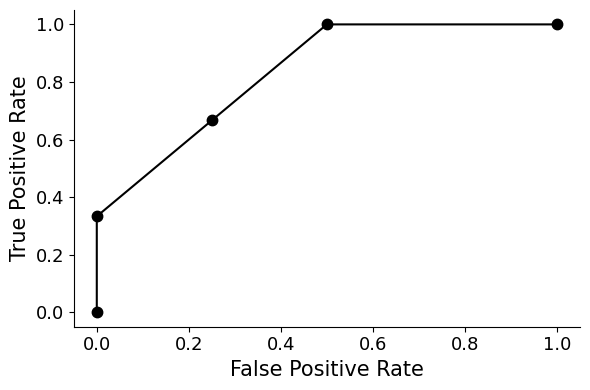

In [3]:
# data from HW
fpr = [0, 0, 1/4, 2/4, 4/4]
tpr = [0, 2/6, 4/6, 6/6, 6/6]

ax=get_ax()

fsize=15

plt.plot(fpr, tpr, c="0", marker=".", markersize=fsize)

# axies settings
plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("False Positive Rate", size=fsize)
plt.ylabel("True Positive Rate", size=fsize)

plt.tight_layout()
plt.savefig("Plots/roc_Q1-5.pdf")

In [4]:
# D is the name of the data file
# returns a df with columns x_1, x_2, y of float values
def read_data(D):
    df = pd.read_csv("data/"+D, sep = " ", names = ["x_1", "x_2", "y"])
    return df

In [5]:
# get D2z.txt into a dataframe
D2z_df = read_data("D2z.txt")

In [6]:
# x_i are floats, df is a datafram
# returns predicted class based on nearest neighbor
def oneNN(x_1, x_2, df):
    # init vars to store best info
    best_dist = None
    best_y = 1
    # loop through df
    for i, row in df.iterrows():
        # calculate euclidean distance
        dist = np.sqrt((row[0]-x_1)**2+(row[1]-x_2)**2)
        # if the distance is the first one calculated, it is the best
        if best_dist == None:
            best_dist = dist
            best_y = row[2]
        # replace old best distance if we find a better one
        elif dist < best_dist:
            best_dist = dist
            best_y = row[2]
    return best_y

In [7]:
# make a grid, predict each point
d1 = {"x_1":[], "x_2":[], "y":[]}
grid_x = np.linspace(-2, 2, 20)
for x_1 in grid_x:
    for x_2 in grid_x:
        y = oneNN(x_1, x_2, D2z_df)
        d1["x_1"].append(x_1)
        d1["x_2"].append(x_2)
        d1["y"].append(int(y))

boundary_df = pd.DataFrame(d1)

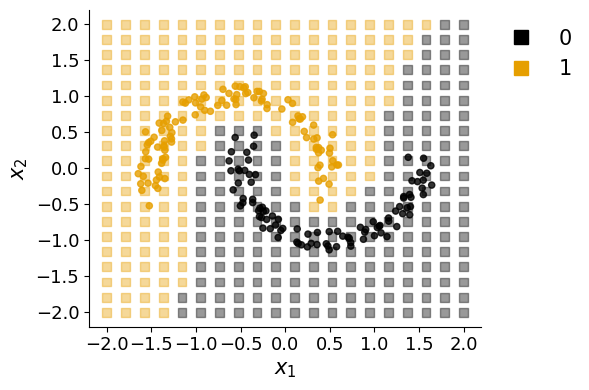

In [8]:
# make axies
ax = get_ax()

# set colors (colorblind friendly via https://yoshke.org/blog/colorblind-friendly-diagrams)
colors = {0: '#000000', 1: '#E69F00'}

# make plot
boundary_df.plot.scatter(x="x_1", y="x_2", c=boundary_df["y"].map(colors), marker="s", s=40, alpha=0.4, ax=ax)
D2z_df.plot.scatter(x="x_1", y="x_2", c=D2z_df["y"].map(colors), alpha=0.8, ax=ax)

# plot settings
fsize = 15
# legend
b_dot = mlines.Line2D([], [], color='#000000', marker='s', linestyle='None',
                          markersize=10, label='0')
o_dot = mlines.Line2D([], [], color='#E69F00', marker='s', linestyle='None',
                          markersize=10, label='1')
ax.legend(handles=[b_dot, o_dot], fontsize=fsize, bbox_to_anchor=(1, 1), frameon=False)

# axies settings
plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("$x_1$", size=fsize)
plt.ylabel("$x_2$", size=fsize)

plt.tight_layout()
plt.savefig("Plots/boundary_plot.pdf")

In [9]:
# get emails.csv as a df
emails_df = pd.read_csv("data/emails.csv")

In [10]:
# make train and test dfs
# the 'Email No.' column isnt needed

single_train_df = emails_df[:4000].drop("Email No.", axis=1)
single_test_df = emails_df[4000:].drop("Email No.", axis=1)

f1_test_df = emails_df[:1000].drop("Email No.", axis=1)
f1_train_df = emails_df[1000:].drop("Email No.", axis=1)

f2_test_df = emails_df[1000:2000].drop("Email No.", axis=1)
f2_train_df = emails_df.iloc[np.r_[0:1000, 2000:5000]].drop("Email No.", axis=1)

f3_test_df = emails_df[2000:3000].drop("Email No.", axis=1)
f3_train_df = emails_df.iloc[np.r_[0:2000, 3000:5000]].drop("Email No.", axis=1)

f4_test_df = emails_df[3000:4000].drop("Email No.", axis=1)
f4_train_df = emails_df.iloc[np.r_[0:3000, 4000:5000]].drop("Email No.", axis=1)

f5_test_df = emails_df[4000:].drop("Email No.", axis=1)
f5_train_df = emails_df[:4000].drop("Email No.", axis=1)

In [11]:
# create the classifier
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
# train the classifier
knn1.fit(f1_train_df.drop("Prediction", axis=1), f1_train_df["Prediction"])
# make predictions
pred_1 = knn1.predict(f1_test_df.drop("Prediction", axis=1))

# find and print the accuracy, precision and recall
acc_1 = metrics.accuracy_score(f1_test_df["Prediction"], pred_1)
pre_1 = metrics.precision_score(f1_test_df["Prediction"], pred_1)
rec_1 = metrics.recall_score(f1_test_df["Prediction"], pred_1)
print(f"fold 1: acc: {acc_1}, pre: {pre_1}, rec: {rec_1}")

# these steps are repeated for the other folds

fold 1: acc: 0.825, pre: 0.6544943820224719, rec: 0.8175438596491228


In [12]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn2.fit(f2_train_df.drop("Prediction", axis=1), f2_train_df["Prediction"])
pred_2 = knn2.predict(f2_test_df.drop("Prediction", axis=1))
acc_2 = metrics.accuracy_score(f2_test_df["Prediction"], pred_2)
pre_2 = metrics.precision_score(f2_test_df["Prediction"], pred_2)
rec_2 = metrics.recall_score(f2_test_df["Prediction"], pred_2)
print(f"fold 2: acc: {acc_2}, pre: {pre_2}, rec: {rec_2}")

fold 2: acc: 0.853, pre: 0.6857142857142857, rec: 0.8664259927797834


In [13]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn3.fit(f3_train_df.drop("Prediction", axis=1), f3_train_df["Prediction"])
pred_3 = knn3.predict(f3_test_df.drop("Prediction", axis=1))
acc_3 = metrics.accuracy_score(f3_test_df["Prediction"], pred_3)
pre_3 = metrics.precision_score(f3_test_df["Prediction"], pred_3)
rec_3 = metrics.recall_score(f3_test_df["Prediction"], pred_3)
print(f"fold 3: acc: {acc_3}, pre: {pre_3}, rec: {rec_3}")

fold 3: acc: 0.862, pre: 0.7212121212121212, rec: 0.8380281690140845


In [14]:
knn4 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn4.fit(f4_train_df.drop("Prediction", axis=1), f4_train_df["Prediction"])
pred_4 = knn4.predict(f4_test_df.drop("Prediction", axis=1))
acc_4 = metrics.accuracy_score(f4_test_df["Prediction"], pred_4)
pre_4 = metrics.precision_score(f4_test_df["Prediction"], pred_4)
rec_4 = metrics.recall_score(f4_test_df["Prediction"], pred_4)
print(f"fold 4: acc: {acc_4}, pre: {pre_4}, rec: {rec_4}")

fold 4: acc: 0.851, pre: 0.7164179104477612, rec: 0.8163265306122449


In [15]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn5.fit(f5_train_df.drop("Prediction", axis=1), f5_train_df["Prediction"])
pred_5 = knn5.predict(f5_test_df.drop("Prediction", axis=1))
acc_5 = metrics.accuracy_score(f5_test_df["Prediction"], pred_5)
pre_5 = metrics.precision_score(f5_test_df["Prediction"], pred_5)
rec_5 = metrics.recall_score(f5_test_df["Prediction"], pred_5)
print(f"fold 5: acc: {acc_5}, pre: {pre_5}, rec: {rec_5}")

fold 5: acc: 0.775, pre: 0.6057441253263708, rec: 0.7581699346405228


In [16]:
# z is a number
# returns sigmoid fxn of z
def sigmoid(z):
    # ignore warnings
    warnings.simplefilter("ignore")
    return 1/(1+np.exp(-z))

# x and theta are vectors, y is a number 
# returns gradient of the loss function for grad descent
def gradient(x, theta, y):
    return x * float((sigmoid(theta.T @ x) - y))

# df is a data frame, rate is a number, iters is an integer
# returns the vector theta
def grad_desc(df, rate, iters):
    # init theta as a zero vector
    theta = np.zeros(len(df.drop("Prediction", axis=1).iloc[0]) + 1)
    theta[0] = 1
    # iterate iters times
    for it in range(iters):
        # loop through the df
        for i, row in df.iterrows():
            # run one step of the grad descent algorithm
            y = row[-1]
            x = pd.concat([pd.Series([1]), row[:-1]])
            theta = theta - rate * gradient(x, theta, y)
    return theta

In [17]:
# theta is a vector, df is a dataframe
# returns the accuracy, precision, recall and list of probabilities
def test_GD(theta, df):
    # init true/false pos/neg, probabilities list variables
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    prob_list = []
    # loop through df
    for i, row in df.iterrows():
        # true_val is the actual y val
        true_val = row[-1]
        x = pd.concat([pd.Series([1]), row[:-1]])
        # prob_val is the prediction
        prob_val = sigmoid(theta @ x)
        prob_list.append(prob_val)
        # see if the prediction is closer to 1 or 0
        if prob_val >= 0.5:
            # update relevant vars
            if true_val == 1:
                TP += 1
            else:
                FP += 1
        else:
            # update relevant vars
            if true_val == 1:
                FN += 1
            else:
                TN += 1
    # calculate accuracy, precision and recall
    acc = (TP + TN) / (TP + FP + TN + FN)
    pre = TP / (TP + FP)
    rec = TP / (TP + FN)
    return acc, pre, rec, prob_list

# train and test are dfs, rate is a number, iters is an integer
# returns the accuracy, precision and recall
def run_GD(train, test, rate, iters):
    # find theta
    theta = grad_desc(train, rate, iters)
    # test theta
    return test_GD(theta, test)

In [18]:
run_GD(f1_train_df, f1_test_df, 0.1, 20)

(0.931,
 0.9354838709677419,
 0.8140350877192982,
 [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  8.290664496586225e-150,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.2767857258980248e-10,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  8.118266040099333e-275,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.272399855910619e-48,
  1.0,
  1.1700107586167115e-219,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
 

In [19]:
run_GD(f2_train_df, f2_test_df, 0.1, 20)

(0.924,
 0.9135802469135802,
 0.8014440433212996,
 [0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  3.244837252254213e-305,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.5170751297092215e-78,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  6.838296940572883e-56,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.895501301989583

In [20]:
run_GD(f3_train_df, f3_test_df, 0.1, 20)

(0.905,
 0.8987341772151899,
 0.75,
 [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.50821974311775e-155,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.2691551033083243e-275,
  0.0,
  1.0,
  0.0,
  4.57348548794593e-97,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.2680792432428312e-08,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.9999999999964888,
  0.0,
  0.0,
  0.0,
  1.2680792432428312e-08,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  2.2361438784434866e-148,
  0.0,
  0.0,
  1

In [21]:
run_GD(f4_train_df, f4_test_df, 0.1, 20)

(0.914,
 0.90625,
 0.7891156462585034,
 [1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  6.978871474877266e-39,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  8.242259058474481e-61,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  6.806602931402526e-162,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.8162953284551254e-219,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0907392326638061e-277,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  4.790746505550834e-188,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  6.2050770235586765e-232,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

In [22]:
run_GD(f5_train_df, f5_test_df, 0.1, 20)

(0.896,
 0.8079268292682927,
 0.8660130718954249,
 [1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0213490414432476e-249,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.1993710262686573e-164,
  1.0,
  1.0,
  1.1993710262686573e-164,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.1410175581257877e-55,
  0.0,
  1.1410175581257877e-55,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.056324048802331717,
  0.0,
  0.0,
  6.237610536556138e-50,
  2.2650158286572007e-36,
  6.237610536556138e-50,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.849704139516103e-133,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [23]:
def kNN(k):
    # run knn for each fold
    knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn1.fit(f1_train_df.drop("Prediction", axis=1), f1_train_df["Prediction"])
    pred_1 = knn1.predict(f1_test_df.drop("Prediction", axis=1))
    acc_1 = metrics.accuracy_score(f1_test_df["Prediction"], pred_1)
    pre_1 = metrics.precision_score(f1_test_df["Prediction"], pred_1)
    rec_1 = metrics.recall_score(f1_test_df["Prediction"], pred_1)
    
    knn2 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn2.fit(f2_train_df.drop("Prediction", axis=1), f2_train_df["Prediction"])
    pred_2 = knn2.predict(f2_test_df.drop("Prediction", axis=1))
    acc_2 = metrics.accuracy_score(f2_test_df["Prediction"], pred_2)
    pre_2 = metrics.precision_score(f2_test_df["Prediction"], pred_2)
    rec_2 = metrics.recall_score(f2_test_df["Prediction"], pred_2)
    
    knn3 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn3.fit(f3_train_df.drop("Prediction", axis=1), f3_train_df["Prediction"])
    pred_3 = knn3.predict(f3_test_df.drop("Prediction", axis=1))
    acc_3 = metrics.accuracy_score(f3_test_df["Prediction"], pred_3)
    pre_3 = metrics.precision_score(f3_test_df["Prediction"], pred_3)
    rec_3 = metrics.recall_score(f3_test_df["Prediction"], pred_3)
    
    knn4 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn4.fit(f4_train_df.drop("Prediction", axis=1), f4_train_df["Prediction"])
    pred_4 = knn4.predict(f4_test_df.drop("Prediction", axis=1))
    acc_4 = metrics.accuracy_score(f4_test_df["Prediction"], pred_4)
    pre_4 = metrics.precision_score(f4_test_df["Prediction"], pred_4)
    rec_4 = metrics.recall_score(f4_test_df["Prediction"], pred_4)
    
    knn5 = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn5.fit(f5_train_df.drop("Prediction", axis=1), f5_train_df["Prediction"])
    pred_5 = knn5.predict(f5_test_df.drop("Prediction", axis=1))
    acc_5 = metrics.accuracy_score(f5_test_df["Prediction"], pred_5)
    pre_5 = metrics.precision_score(f5_test_df["Prediction"], pred_5)
    rec_5 = metrics.recall_score(f5_test_df["Prediction"], pred_5)
    
    # find and return average scores
    mean_acc = np.mean([acc_1, acc_2, acc_3, acc_4, acc_5])
    mean_pre = np.mean([pre_1, pre_2, pre_3, pre_4, pre_5])
    mean_rec = np.mean([rec_1, rec_2, rec_3, rec_4, rec_5])
    return mean_acc, mean_pre, mean_rec

In [24]:
# make list of ks from Q2.4
k_list = [1, 3, 5, 7, 10]
# get average accuracy for each knn with k from k_list
acc_list = [kNN(k)[0] for k in k_list]

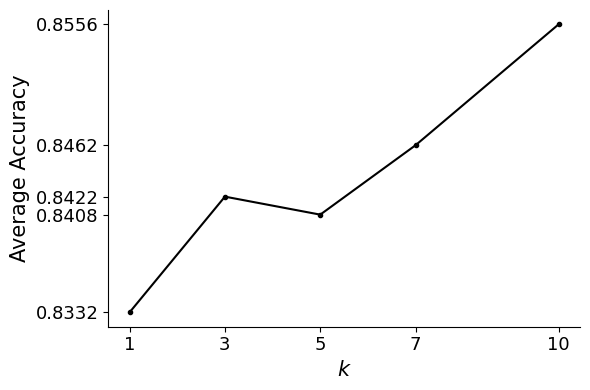

In [25]:
ax = get_ax()

plt.plot(k_list, acc_list, c="0", marker=".")

# plot settings
fsize = 15

# axies settings
plt.xticks(k_list, size=fsize-2)
plt.yticks(acc_list, size=fsize-2)
plt.xlabel("$k$", size=fsize)
plt.ylabel("Average Accuracy", size=fsize)

plt.tight_layout()
plt.savefig("Plots/avg_acc.pdf")

In [26]:
# train kNN, k=5
knn_s = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_s.fit(single_train_df.drop("Prediction", axis=1), single_train_df["Prediction"])
# predict probabilities
pred_knn = knn_s.predict_proba(single_test_df.drop("Prediction", axis=1))
# get roc data
knn_roc = metrics.roc_curve(single_test_df["Prediction"], pred_knn[:, 1])

In [27]:
# train logistic regression
pred_reg = run_GD(single_train_df, single_test_df, 0.1, 20)[-1]
# get roc data
reg_roc = metrics.roc_curve(single_test_df["Prediction"], pred_reg)

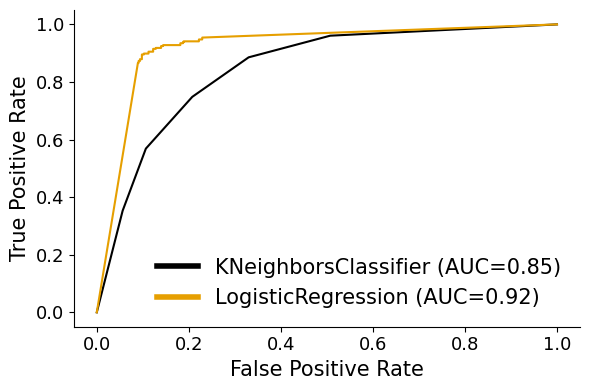

In [28]:
ax = get_ax()

plt.plot(knn_roc[0], knn_roc[1], c="0")
plt.plot(reg_roc[0], reg_roc[1], c="#E69F00")

# get and round auc score
knn_auc = round(metrics.roc_auc_score(single_test_df["Prediction"], pred_knn[:, 1]), 2)
reg_auc = round(metrics.roc_auc_score(single_test_df["Prediction"], pred_reg), 2)

# plot settings
fsize = 15
knn_lab = f"KNeighborsClassifier (AUC={knn_auc})"
reg_lab = f"LogisticRegression (AUC={reg_auc})"

# legend
b_dot = mlines.Line2D([], [], color='#000000', lw=4, label=knn_lab)
o_dot = mlines.Line2D([], [], color='#E69F00', lw=4, label=reg_lab)
ax.legend(handles=[b_dot, o_dot], fontsize=fsize, frameon=False)

# axies settings
plt.xticks(size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("False Positive Rate", size=fsize)
plt.ylabel("True Positive Rate", size=fsize)

plt.tight_layout()
plt.savefig("Plots/roc_Q2-5.pdf")